# Predicting vigilance using machine learning
## Random forest building
Rosalie Lucas


In [128]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score


# Installed Graphviz using Pip3

In [129]:
PATH = '/Users/roos/Developer/Bachelor-Thesis'

In [130]:
data_file_path = '/Users/roos/Data/test_data.csv'
data_file = pd.read_csv(data_file_path)

for column in data_file:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data_file[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data_file.isnull().sum())

The number of values for feature 0 : 1000
The number of values for feature 1 : 1000
The number of values for feature 2 : 1000
The number of values for feature 3 : 1000
The number of values for feature 4 : 1000
The number of values for feature 5 : 1000
The number of values for feature 6 : 1000
The number of values for feature 7 : 1000
The number of values for feature 8 : 2 -- [0. 1.]
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


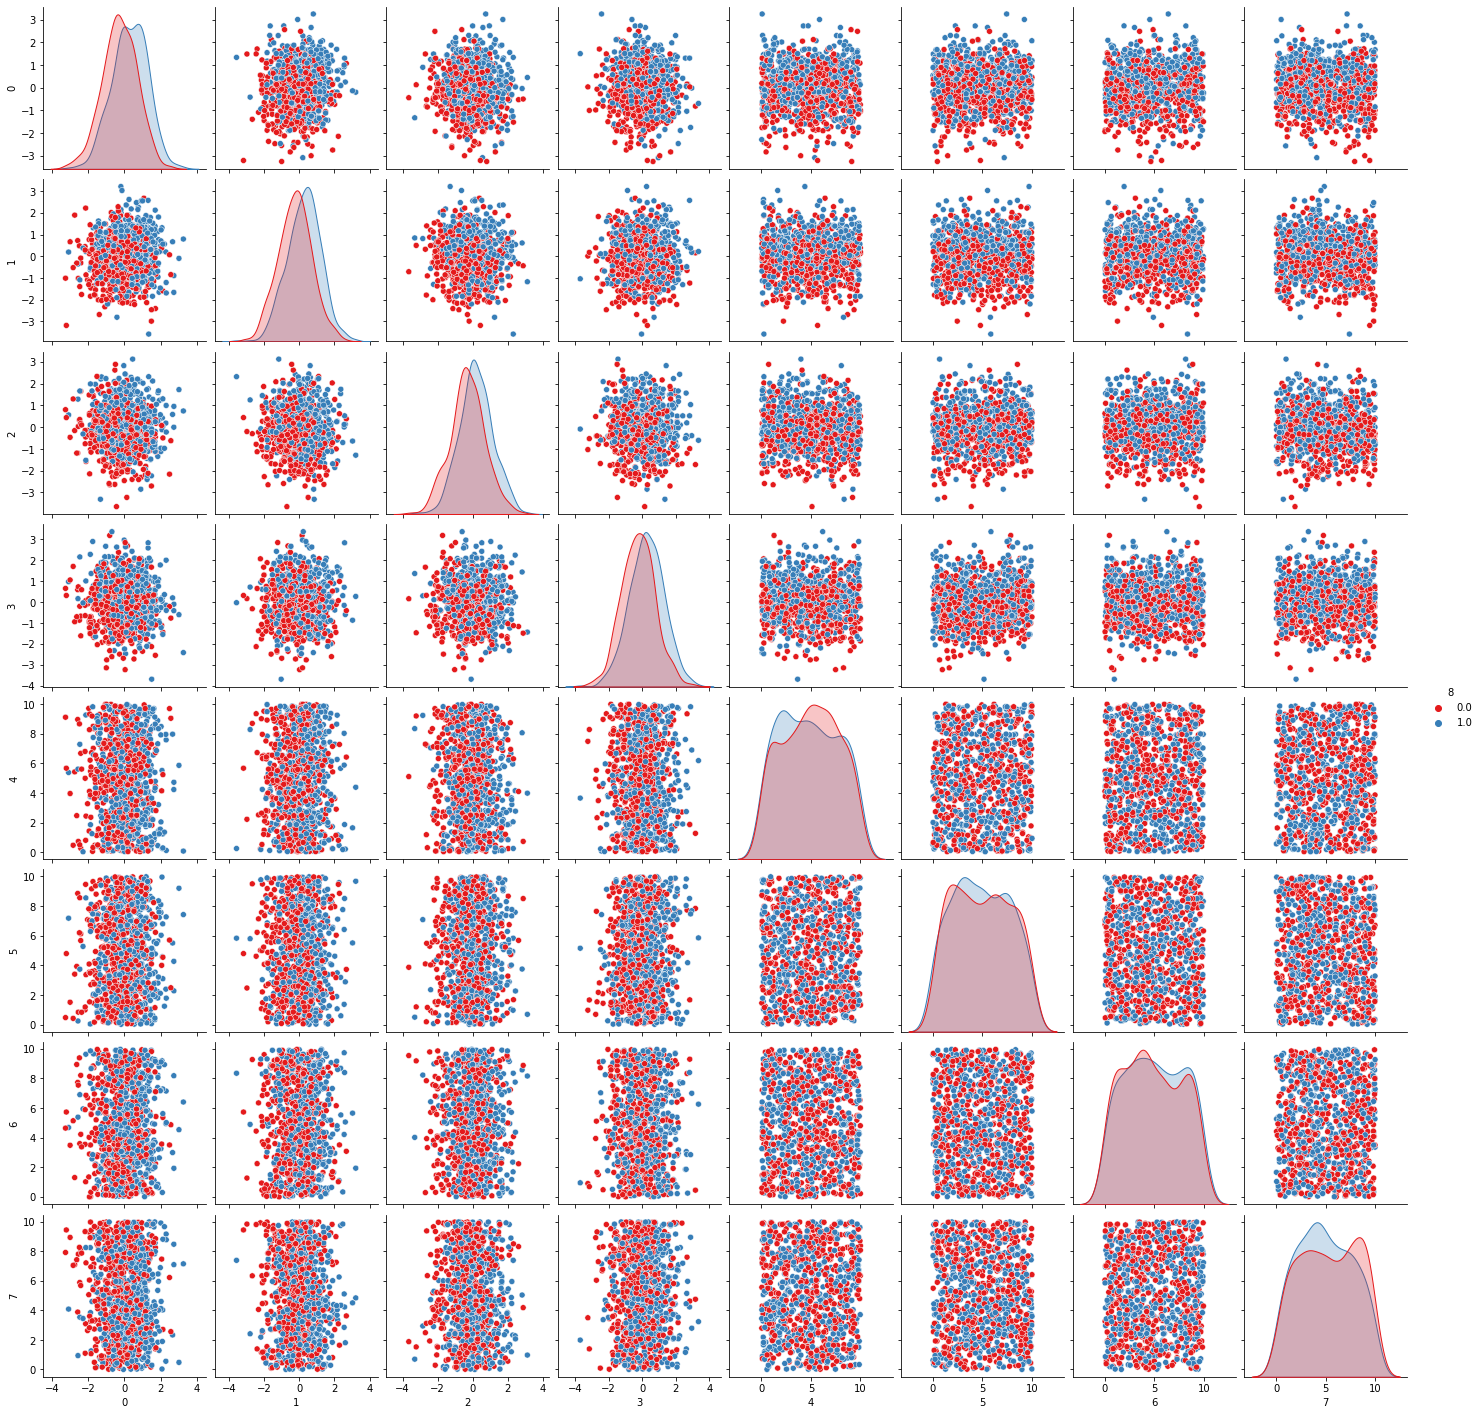

In [131]:
plot = sns.pairplot(data_file, hue='8', palette="Set1")

In [132]:
# Splitting the data
X = data_file.drop('8', axis=1).values
Y = data_file['8'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (1000, 8)
Y shape: (1000,)


In [133]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=2, random_state=1)

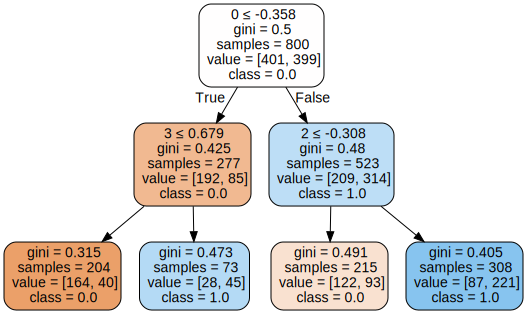

In [134]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_file.drop('8', axis=1).columns,
                                   class_names=data_file['8'].unique().astype(str),
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [135]:
final = ''
fi = ''
for i, column in enumerate(data_file.drop('8', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature 0:, 0.441
Importance of feature 1:, 0.000
Importance of feature 2:, 0.291
Importance of feature 3:, 0.268
Importance of feature 4:, 0.000
Importance of feature 5:, 0.000
Importance of feature 6:, 0.000
Importance of feature 7:, 0.000


,index,Variable,Feature Importance Score
0,0,0,0.440927
1,2,2,0.290596
2,3,3,0.268477
3,1,1,0.000000
4,4,4,0.000000
5,5,5,0.000000
6,6,6,0.000000
7,7,7,0.000000


In [136]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.69
Testing Accuracy is:  0.625


In [137]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.675


In [138]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_file.drop('8', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2


Importance of feature 0:, 0.163
Importance of feature 1:, 0.153
Importance of feature 2:, 0.154
Importance of feature 3:, 0.150
Importance of feature 4:, 0.091
Importance of feature 5:, 0.099
Importance of feature 6:, 0.093
Importance of feature 7:, 0.096


,index,Variable,Feature Importance Score
0,0,0,0.163405
1,2,2,0.154296
2,1,1,0.152872
3,3,3,0.150338
4,5,5,0.098849
5,7,7,0.095967
6,6,6,0.092950
7,4,4,0.091322
